In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/BEMOC/Dataset/BEmoC7k.xlsx')

In [3]:
df.head

<bound method NDFrame.head of                                                    TEXT  classes
0                              নাইমা কি করবেন আমরা জানি  sadness
1                          ভাই সব আপনাদের খুব ভাল লাগছে      joy
2     গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত  বয়কটে ...    anger
3     অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...      joy
4         বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর  disgust
...                                                 ...      ...
6995  হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন   ...  sadness
6996  ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...      joy
6997  বছরের সবচেয়ে সেরা ভিডিও দেখেছি  আমাদের দেশের স...      joy
6998   কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...    anger
6999  \nভাইরেভাই বেস্ট এইটা বেস্ট\nএইরকম পারফেক্ট গল...      joy

[7000 rows x 2 columns]>

In [4]:
df.groupby("classes").describe()

TEXT                                                               
         count unique                                                top freq
classes                                                                      
anger     1052   1037  একদিন এই বেইলি রোডে কতো ভিজেছি রিক্সায়  আজ তু...    2
disgust   1356   1334  মানুষ অন্যকে উপদেশ দেয়  টা কারণে \n   সে ওই মা...    2
fear       962    951  বাইরে কেমন যেন একটা খসখস শব্দ হচ্ছে  তার মনে হ...    2
joy       1524   1453  বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত্রী মা...    4
sadness   1327   1303  সবাই তোমাকে কষ্ট দিবে  তোমাকে শুধু এমন একজন কে...    2
surprise   779    759  কিছুক্ষণ আগে লক্ষ্য করলাম  কিছু মানুষ বাঙলাদেশ...    4

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['TEXT', 'classes'], dtype='object')

In [8]:
df.head

<bound method NDFrame.head of                                                    TEXT  classes
0                              নাইমা কি করবেন আমরা জানি  sadness
1                          ভাই সব আপনাদের খুব ভাল লাগছে      joy
2     গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত  বয়কটে ...    anger
3     অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...      joy
4         বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর  disgust
...                                                 ...      ...
6995  হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন   ...  sadness
6996  ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...      joy
6997  বছরের সবচেয়ে সেরা ভিডিও দেখেছি  আমাদের দেশের স...      joy
6998   কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...    anger
6999  \nভাইরেভাই বেস্ট এইটা বেস্ট\nএইরকম পারফেক্ট গল...      joy

[7000 rows x 2 columns]>

In [9]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [10]:
df['TEXT'] = df['TEXT'].apply(clean_text)

In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["classes_bin"] = lb_make.fit_transform(df["classes"])
df[["classes_bin", "classes"]].head(11)

,classes_bin,classes
0,4,sadness
1,3,joy
2,0,anger
3,3,joy
4,1,disgust
5,0,anger
6,3,joy
7,1,disgust
8,1,disgust
9,3,joy


In [12]:
df

,TEXT,classes,classes_bin
0,নাইমা কি করবেন আমরা জানি,sadness,4
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,3
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,0
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,3
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,1
...,...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness,4
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy,3
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের ...,joy,3
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger,0


In [13]:
df.isnull()

,TEXT,classes,classes_bin
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6995,False,False,False
6996,False,False,False
6997,False,False,False
6998,False,False,False


In [14]:
df.dropna(inplace=True)

In [15]:
df

,TEXT,classes,classes_bin
0,নাইমা কি করবেন আমরা জানি,sadness,4
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,3
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,0
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,3
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,1
...,...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness,4
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy,3
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের ...,joy,3
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger,0


In [16]:
text = df['TEXT'].values.tolist()

In [17]:
df.groupby("classes").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
classes                                                
anger         1052.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
disgust       1356.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
fear           962.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
joy           1524.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
sadness       1327.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
surprise       779.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [18]:
df["classes"].value_counts()

joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: classes, dtype: int64

In [19]:
longest_string = max(df["TEXT"], key=len)
print(len(longest_string))

1120


In [20]:
text = df["TEXT"]

In [21]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(7000, 3004)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['classes_bin'], test_size=0.2, random_state=42)

Y_pre = df['classes']
target_names = list(set(Y_pre))

In [24]:
target_names

['surprise', 'joy', 'anger', 'fear', 'disgust', 'sadness']

In [25]:
X_train

<5600x3004 sparse matrix of type '<class 'numpy.float64'>'
	with 61757 stored elements in Compressed Sparse Row format>

In [26]:
y_train

1032    4
6339    1
3886    0
2653    2
6914    3
       ..
3772    3
5191    2
5226    3
5390    5
860     3
Name: classes_bin, Length: 5600, dtype: int32

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [28]:
import seaborn as sn

# Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.47214285714285714
              precision    recall  f1-score   support

    surprise       0.39      0.11      0.18       192
         joy       0.42      0.45      0.44       286
       anger       0.77      0.58      0.66       189
        fear       0.45      0.77      0.57       312
     disgust       0.42      0.56      0.48       261
     sadness       0.80      0.10      0.18       160

    accuracy                           0.47      1400
   macro avg       0.54      0.43      0.42      1400
weighted avg       0.51      0.47      0.44      1400



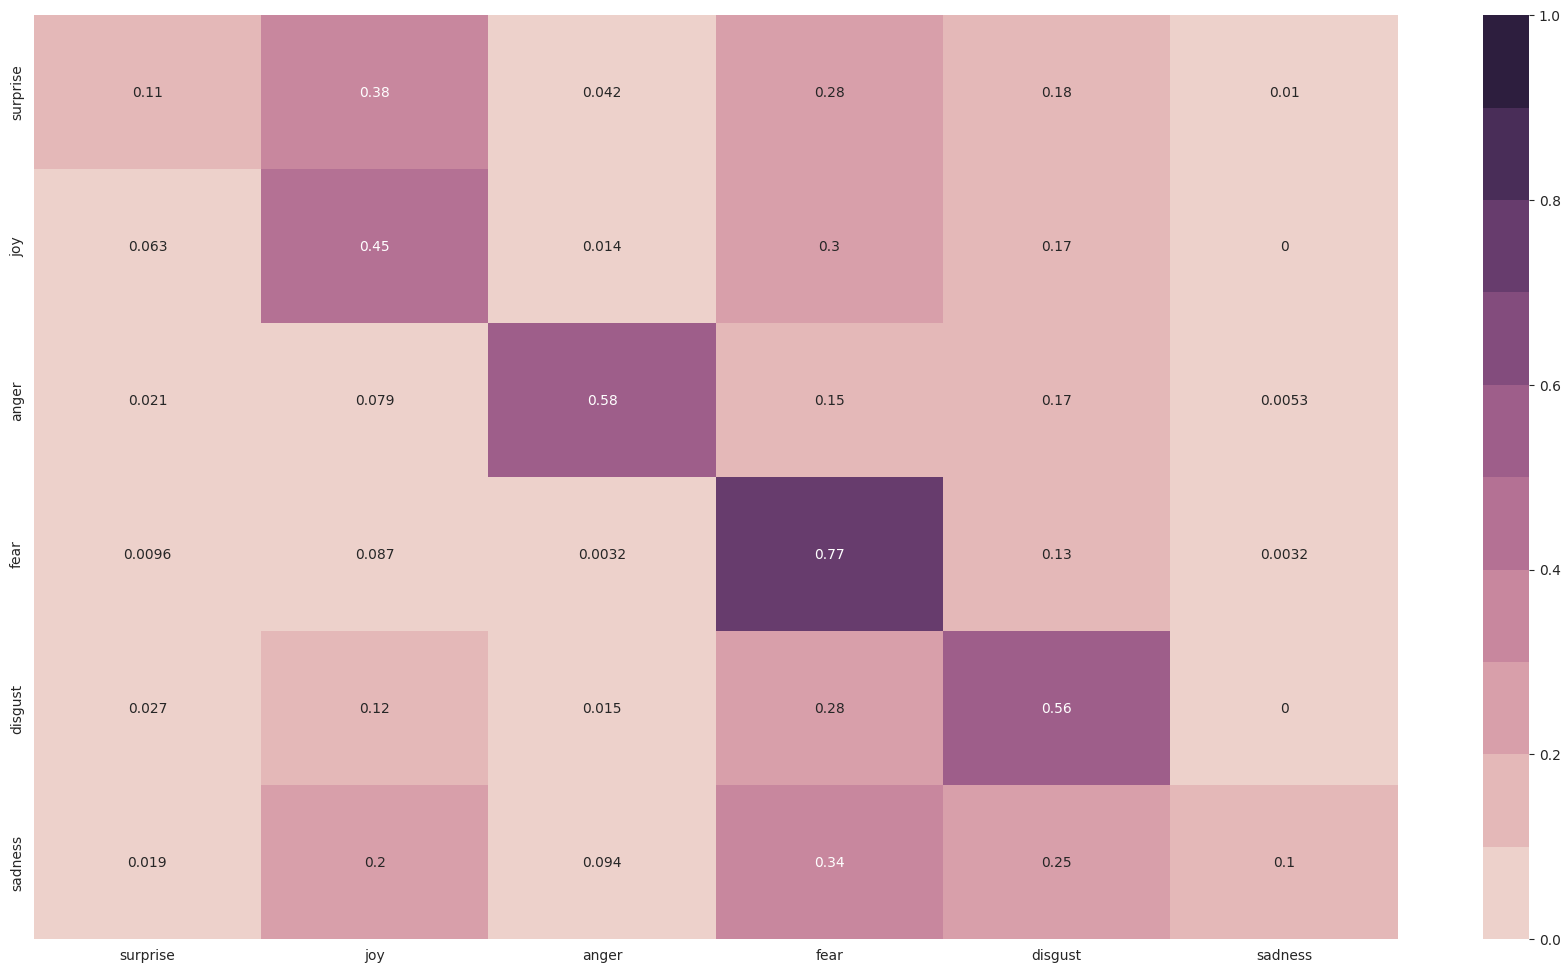

In [30]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [31]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [32]:
from sklearn.svm import SVC


Test set accuracy 0.5135714285714286
              precision    recall  f1-score   support

    surprise       0.43      0.26      0.32       192
         joy       0.40      0.53      0.46       286
       anger       0.86      0.60      0.71       189
        fear       0.54      0.63      0.58       312
     disgust       0.46      0.54      0.50       261
     sadness       0.66      0.40      0.50       160

    accuracy                           0.51      1400
   macro avg       0.56      0.49      0.51      1400
weighted avg       0.54      0.51      0.51      1400



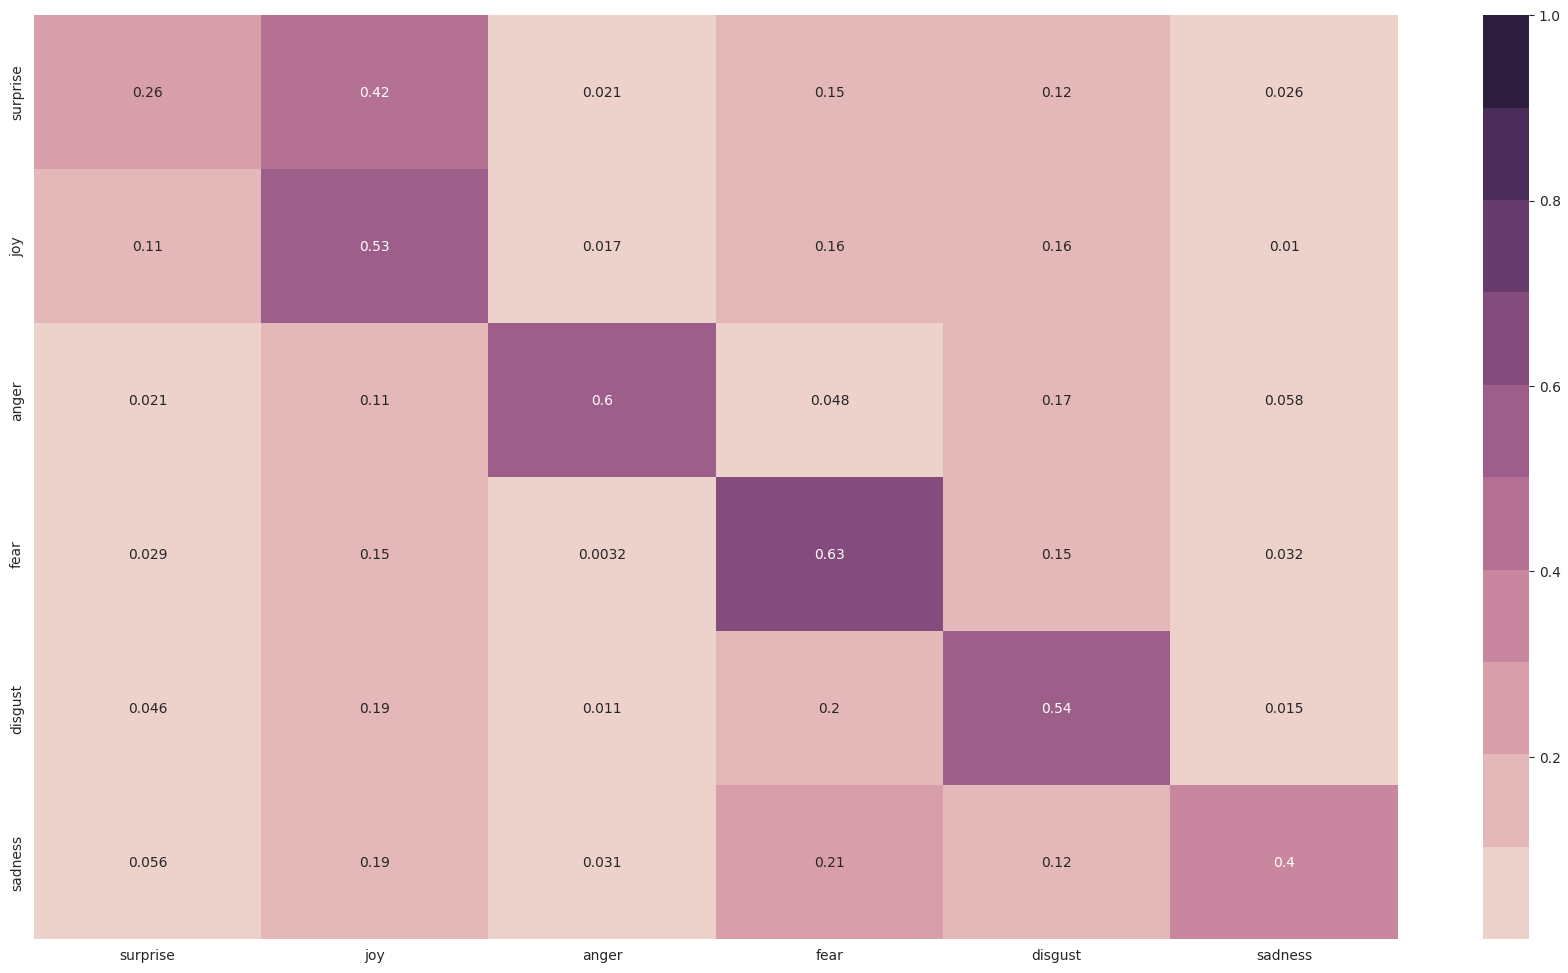

In [33]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [34]:
from xgboost import XGBClassifier

Test set accuracy 0.46785714285714286
              precision    recall  f1-score   support

    surprise       0.29      0.24      0.26       192
         joy       0.35      0.45      0.39       286
       anger       0.80      0.65      0.72       189
        fear       0.52      0.57      0.55       312
     disgust       0.43      0.43      0.43       261
     sadness       0.57      0.43      0.49       160

    accuracy                           0.47      1400
   macro avg       0.49      0.46      0.47      1400
weighted avg       0.48      0.47      0.47      1400



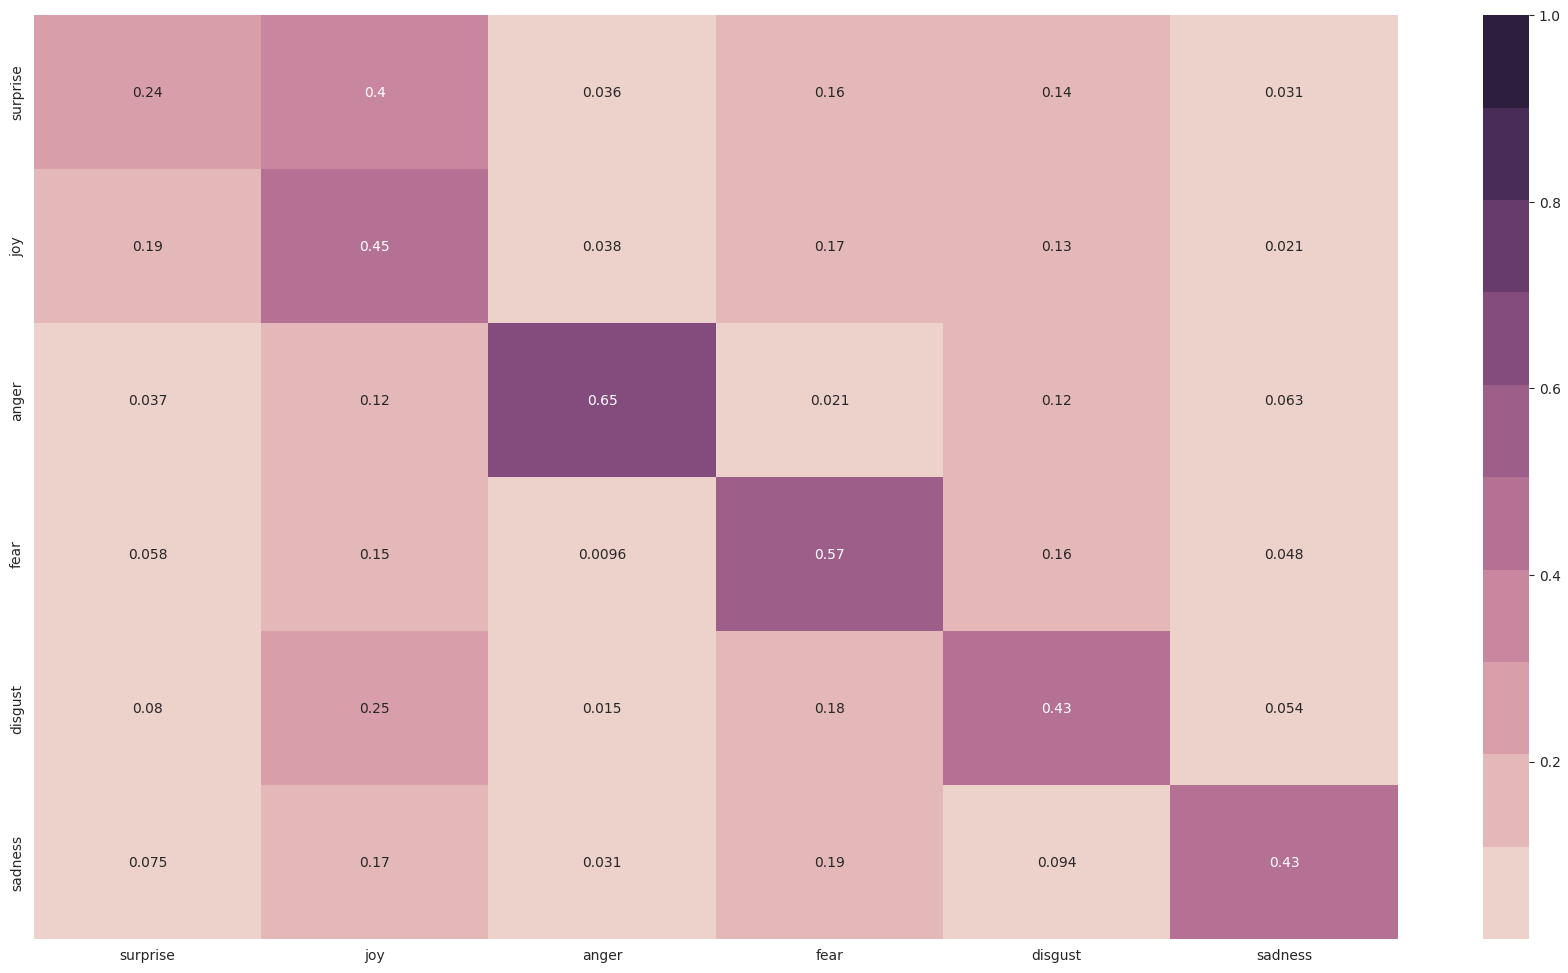

In [35]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.49357142857142855
              precision    recall  f1-score   support

    surprise       0.37      0.31      0.34       192
         joy       0.37      0.43      0.40       286
       anger       0.82      0.66      0.73       189
        fear       0.51      0.61      0.56       312
     disgust       0.45      0.48      0.47       261
     sadness       0.68      0.41      0.51       160

    accuracy                           0.49      1400
   macro avg       0.53      0.48      0.50      1400
weighted avg       0.51      0.49      0.50      1400



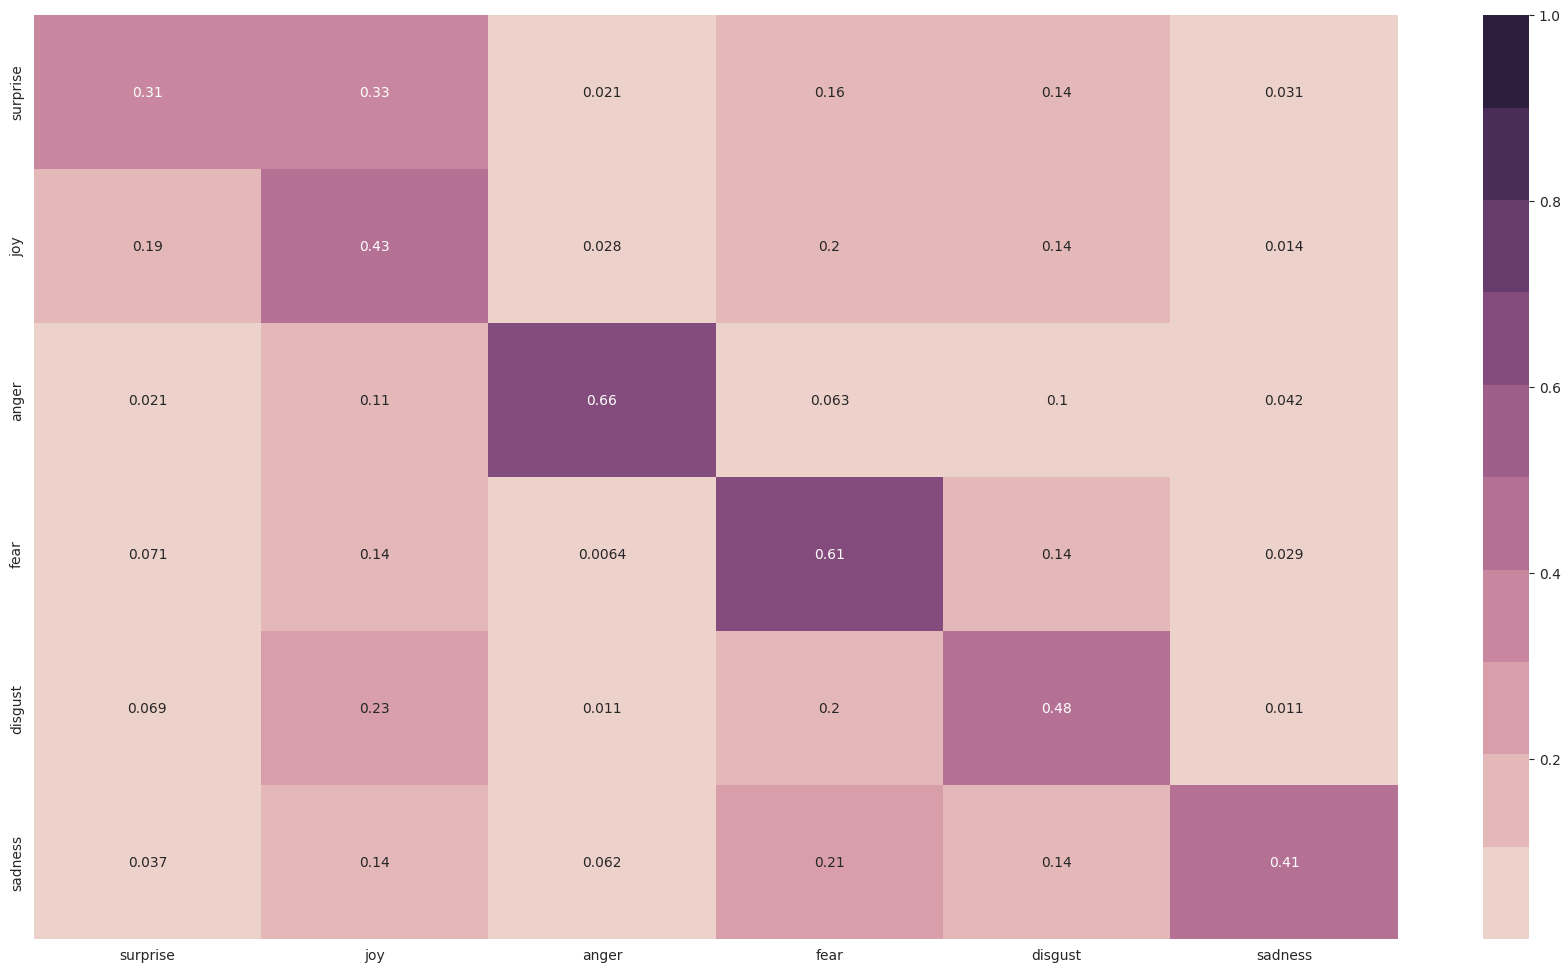

In [37]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  